In [1]:
# import 套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/6506/Desktop/簡報製作/範例資料檔.csv',encoding='ANSI',index_col='No.')

In [ ]:
# 匯入資料相對路徑
import os
path=os.path.abspath('.') +'/範例資料檔.csv'
df=pd.read_csv(open(path))

In [3]:
d=df.dtypes==object
for i in ('性別',d[d==True].index[0:]):
    dummies=pd.get_dummies( df.loc[:, i], prefix=i)
    df = pd.concat( [df, dummies], axis = 1 )
    df=df.drop(i,axis=1)

In [4]:
# random code
RS=42
# ElasticNet
from sklearn.linear_model import LinearRegression,ElasticNet
clf = [
        ['LinearRegression',LinearRegression()],     
        ['L1正規化',ElasticNet(alpha=1,l1_ratio=1,random_state=RS)],
        ['L2正規化',ElasticNet(alpha=1,l1_ratio=0,random_state=RS)],
        ['L1+L2',ElasticNet(alpha=1,l1_ratio=0.5,random_state=RS)],
]

In [5]:
X=df.drop(['國文','英文','數學','歷史','物理','總成績'],axis=1)
y=df['總成績']
result=pd.DataFrame(index=[clf[i][0] for i in range(4)],columns=X.columns)
result['$R^2$']=0

In [6]:
for i in range(4):
    clf[i][1].fit(X,y)
    result.iloc[i,-1]=clf[i][1].score(X,y)
    result.iloc[i,:-1]=clf[i][1].coef_

C:\Users\6506\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11676.320937933688, tolerance: 2.8857800000000005
  positive)


In [7]:
pd.set_option('display.float_format',lambda x : '%.6f' % x)
result

,身高,體重,研讀時數,智力測驗,性別_1,性別_2,居住地區_信義區,居住地區_內湖區,居住地區_南港區,$R^2$
LinearRegression,-0.617373,0.894438,-9.507829,-0.042511,11.894688,-11.894688,-3.177898,-4.643320,7.821218,0.303844
L1正規化,-0.654377,0.746312,-8.779950,-0.101434,19.062134,-0.000000,-0.000000,-0.000000,3.679660,0.294342
L2正規化,-0.734379,0.789939,-6.746234,-0.141477,3.676703,-3.676703,-0.123696,-0.723644,0.847340,0.242739
L1+L2,-0.796859,0.840111,-7.567740,-0.126404,5.062733,-5.062744,-0.000000,-0.342272,1.053474,0.261888


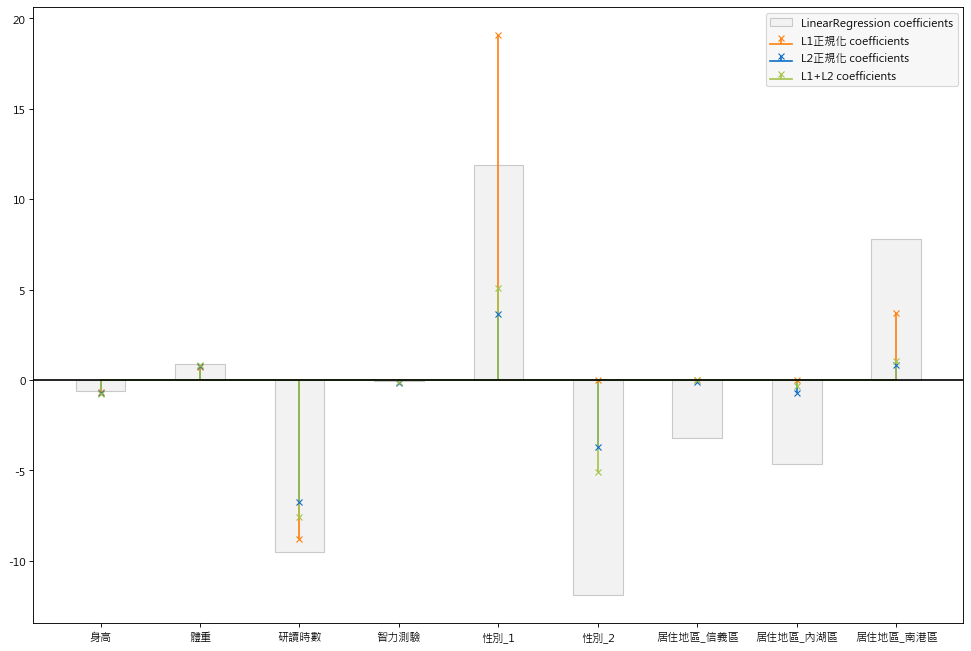

In [54]:
X=result.loc['LinearRegression'][:-1]
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(X.index,X,
        edgecolor='#C9C9C9',
#         color=np.where(X>0,'#4c77a6','#e15759'),
        color='#f2f2f2',
        width=0.5,label='LinearRegression coefficients')
for n,i in enumerate(result.index[1:]):
    c=['#ff7f0e','#0f6fc6','#a5c349']
    X=result.loc[i][:-1]
    plt.setp(plt.stem(X.index,X, markerfmt='x',label=i+' coefficients',use_line_collection=True),color=c[n],alpha=1)
plt.legend(facecolor='#f5f5f5')
plt.axhline(0, color='k')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

fig, ax = plt.subplots()


x = [0, 1]
y = [0, 0]


ax.plot(x, y)


dy = 5/72

i = 1  # 0 for dx

tmp = ax.transData.transform([(0,0), (1,1)])
tmp = tmp[1,i] - tmp[0,i]  # 1 unit in display coords
tmp = 1/tmp  # 1 pixel in display coords
tmp = tmp*dy*ax.get_figure().get_dpi()  # shift pixels in display coords

ax.plot(x, y)

ax.annotate("", [0,tmp], [1,tmp],
            size = 10,
            arrowprops = dict(arrowstyle = '<|-|>'))

plt.show()

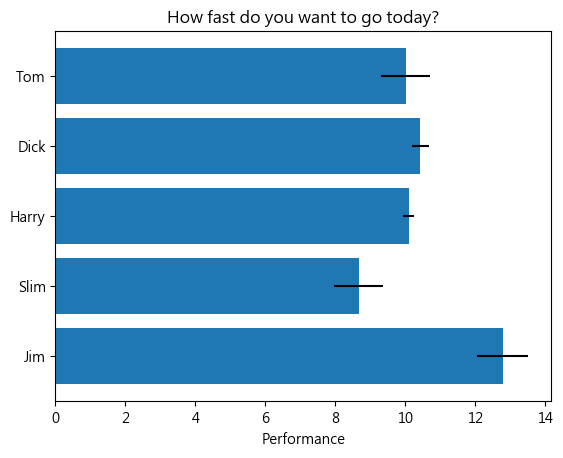

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

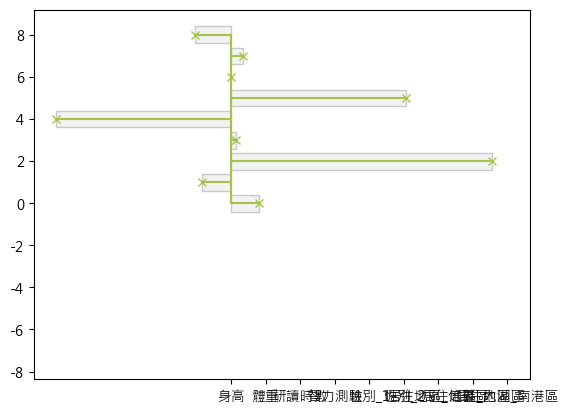

In [128]:
import numpy
from matplotlib import pyplot, transforms

# first of all, the base transformation of the data points is needed
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

# fig,ax = plt.subplots()
plt.bar(X.index,X,
        edgecolor='#C9C9C9',
        color='#f2f2f2',
        label='LinearRegression coefficients', transform= rot + base)
# ax.invert_yaxis() 

stem=plt.stem(X.index,X, markerfmt='x',label=i+' coefficients',use_line_collection=True)
plt.setp(stem,color=c[n],alpha=1
          , transform= rot + base)

# ax.set_yticklabels(X.index)
# or alternatively, use:
# stem.set_transform(rot + base)

plt.show()

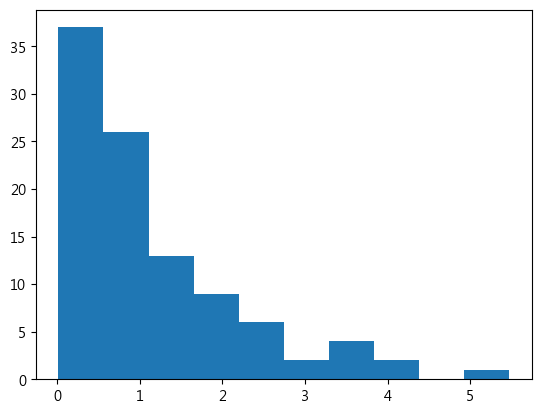

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 640x480 with 0 Axes>

In [127]:
data = np.random.exponential(1, 100)

# Showing the first plot.
plt.hist(data, bins=10)
plt.show()

# Cleaning the plot (useful if you want to draw new shapes without closing the figure
# but quite useless for this particular example. I put it here as an example).
plt.gcf().clear()

# Showing the plot with horizontal orientation
plt.bar(data, bins=10, orientation='horizontal')
plt.show()

# Cleaning the plot.
plt.gcf().clear()

# Showing the third plot with orizontal orientation and inverted y axis.
plt.hist(data, bins=10, orientation='horizontal')
plt.gca().invert_yaxis()
plt.show()